In [54]:
import random
import time
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import psutil

In [56]:
phys_cpu = psutil.cpu_count(logical = False) # physical cores (2 in my case)
threads = psutil.cpu_count() # logical cores (4 in my case)

In [14]:
def do_work():
    for _ in range(100000):
        random.randint(1, 40) ** random.randint(1, 20)

In [23]:
# decorator
def measure_time(func):
    def inner_func(*args, **kwargs):
        start = time.time()
        for _ in range(5):
            func(*args, **kwargs)
        end = time.time()
        return (end - start)/5
    return inner_func

In [28]:
@measure_time
def work_with_n_proc(n_proc):
    procs = [multiprocessing.Process(target=do_work) for _ in range(n_proc)]
    for proc in procs:
        proc.start()
    for proc in procs:
        proc.join()

In [63]:
result = []

Долгий кусок:

In [64]:
for i in range(1, threads*2+1):
    result.append(work_with_n_proc(i))

### interesting_plot

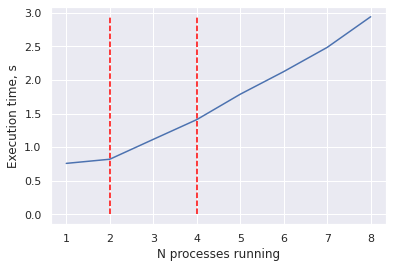

In [65]:
sns.set_theme()
sns.lineplot(x=[i for i in range(1, threads*2+1)], y=result)
plt.ylabel('Execution time, s')
plt.xlabel('N processes running')
plt.vlines(x=[phys_cpu, threads], color='red', ls='--', ymin=0, ymax=max(result));

My computer has only 2 physical cores and 4 logical cores (this is reflected in the red lines on the graph).

The `do_work` process uses almost exclusively computional(?я имею ввиду модуль сложения) processor power, and therefore occupies the entire physical core. In this case, only two parallel processes are effectively running.

Logical threads give an increase in performance, but, in this case, are almost useless (slightly steep growth of the graph between the red lines). A further increase in processes leads to the fact that they will be executed one after another, and multiprocessing in this case will even interfere and increase the program's running time.